# Netflix Data: Cleaning, Analysis and Visualization

# Introduction:

This project focused on cleaning, analyzing, and visualizing Netflix data using Python and SQL. Insights were derived by querying and structuring content by attributes like type and country. Data analysis revealed trends, patterns, and essential metrics within the Netflix dataset. For visualization, Python libraries such as pandas, matplotlib, and seaborn were employed, offering a detailed overview of Netflix's content distribution and statistics.

# Importing Libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "1012",
                             database = "netflix")
cur = db.cursor()  

# Importing Dataset:

In [3]:
data = pd.read_csv("D:\Data Analysis\unfied mentor internship/netflix1.csv")
data.head(10)

,show_id,show_type,show_title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,05-01-2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,05-01-2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


# About Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   show_type     8790 non-null   object
 2   show_title    8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


# Count the Number of Movies and TV Shows.

In [5]:
query = """SELECT show_type, COUNT(*) AS count
FROM netflix1
GROUP BY Show_type"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Type","Count"])
df

,Type,Count
0,Movie,145
1,TV Show,119


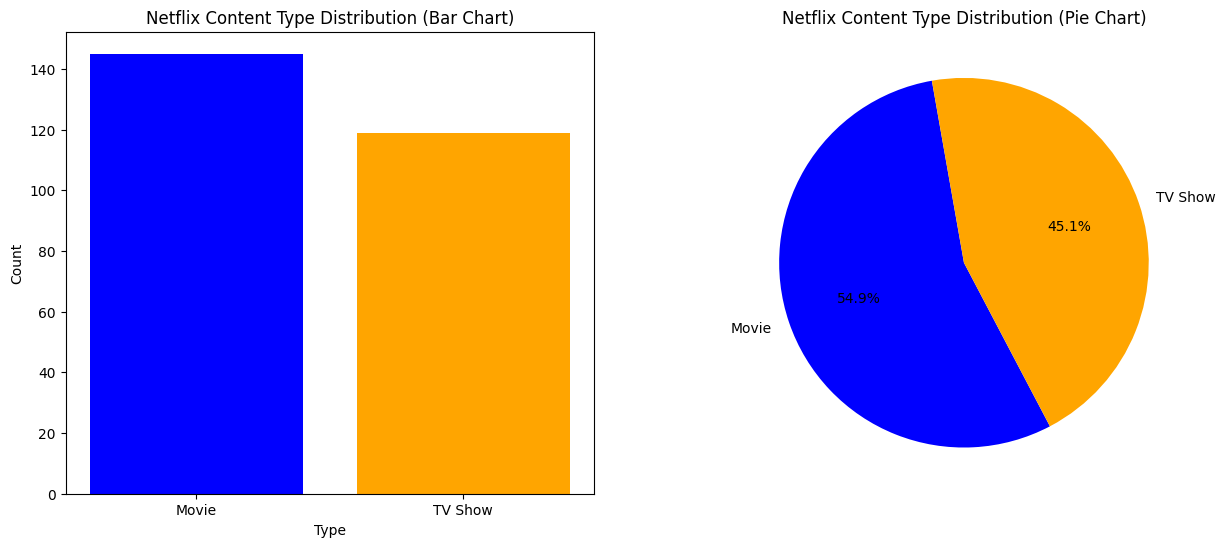

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Bar Chart
colors = ['blue', 'orange',]
axes[0].bar(df['Type'], df['Count'], color=colors)
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Count')
axes[0].set_title('Netflix Content Type Distribution (Bar Chart)')

# Pie Chart
colors = ['blue', 'orange']  # Customize colors as needed
explode = (0.1, 0)  # Explode the first slice
axes[1].pie(df['Count'], labels=df['Type'], colors=colors, autopct='%1.1f%%', startangle=100)
axes[1].set_title('Netflix Content Type Distribution (Pie Chart)')
plt.show()

# Finding the Most Common Genre Combinations.

In [7]:
query = """SELECT listed_in, COUNT(*) AS genre_count
FROM netflix1
GROUP BY listed_in
ORDER BY genre_count DESC
LIMIT 5"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Categories","Genre"])
df

,Categories,Genre
0,"Action & Adventure, Anime Features, Internatio...",12
1,Kids' TV,12
2,"Children & Family Movies, Comedies",9
3,Reality TV,8
4,"International TV Shows, Romantic TV Shows, TV ...",8


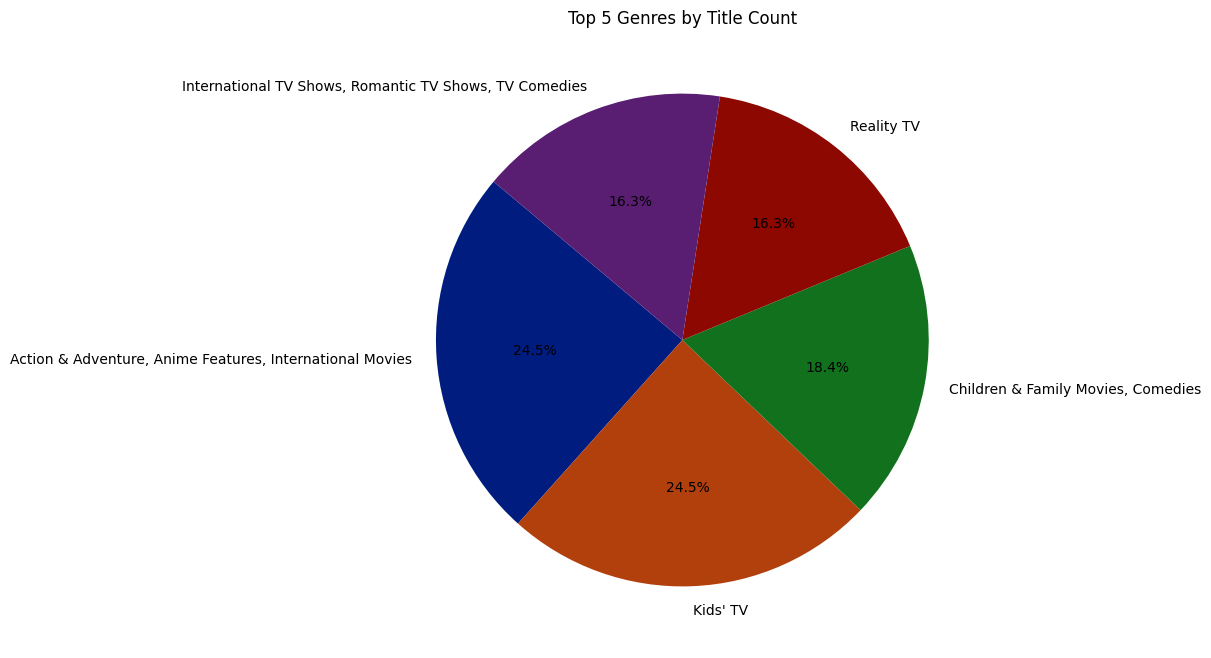

In [8]:
query = """SELECT listed_in, COUNT(*) AS genre_count
FROM netflix1
GROUP BY listed_in
ORDER BY genre_count DESC
LIMIT 5"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Categories","Genre"])
colors = sns.color_palette("dark", len(df))  # Choose a color palette
plt.figure(figsize=(8, 8))
plt.pie(df['Genre'], labels=df['Categories'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Genres by Title Count')
plt.show()

# Top 10 years having most numbers of content.

In [9]:
query = """SELECT release_year, COUNT(*) AS titles_added
FROM netflix.netflix1
GROUP BY release_year
ORDER BY release_year DESC
LIMIT 10"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Release Year","Total Contents"])
df

,Release Year,Total Contents
0,2021,116
1,2020,30
2,2019,12
3,2018,12
4,2017,8
5,2016,5
6,2015,4
7,2014,3
8,2013,5
9,2012,1


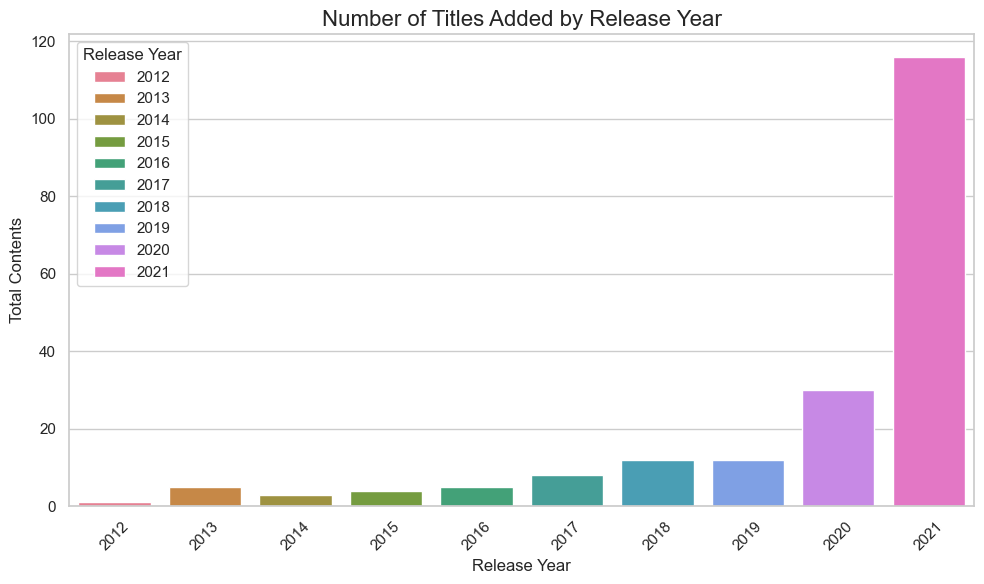

In [10]:
query = """SELECT release_year, COUNT(*) AS titles_added
FROM netflix.netflix1
GROUP BY release_year
ORDER BY release_year DESC
LIMIT 10"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Release Year","Total Contents"])
df = pd.DataFrame(data, columns=["Release Year", "Total Contents"])
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(df)) 
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x="Release Year", y="Total Contents", hue='Release Year', data=df, palette=palette)
plt.title("Number of Titles Added by Release Year", fontsize=16)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Total Contents", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Finding the Top 10 Directors with the Most Titles.

In [11]:
query = """SELECT director, COUNT(*) AS title_count
FROM netflix1
WHERE director IS NOT NULL
GROUP BY director
ORDER BY title_count DESC
LIMIT 9 OFFSET 1"""           # becouse top rank holds "Not Given"
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Director Name","Count"])
df

,Director Name,Count
0,"Krysia Plonka, Kristian Mercado",4
1,"Mark Thornton, Todd Kauffman",4
2,Toshiya Shinohara,4
3,Suhas Kadav,4
4,Masahiko Murata,3
5,Delhiprasad Deenadayalan,2
6,Hajime Kamegaki,2
7,Antoine Fuqua,2
8,"Chapman Way, Maclain Way",2


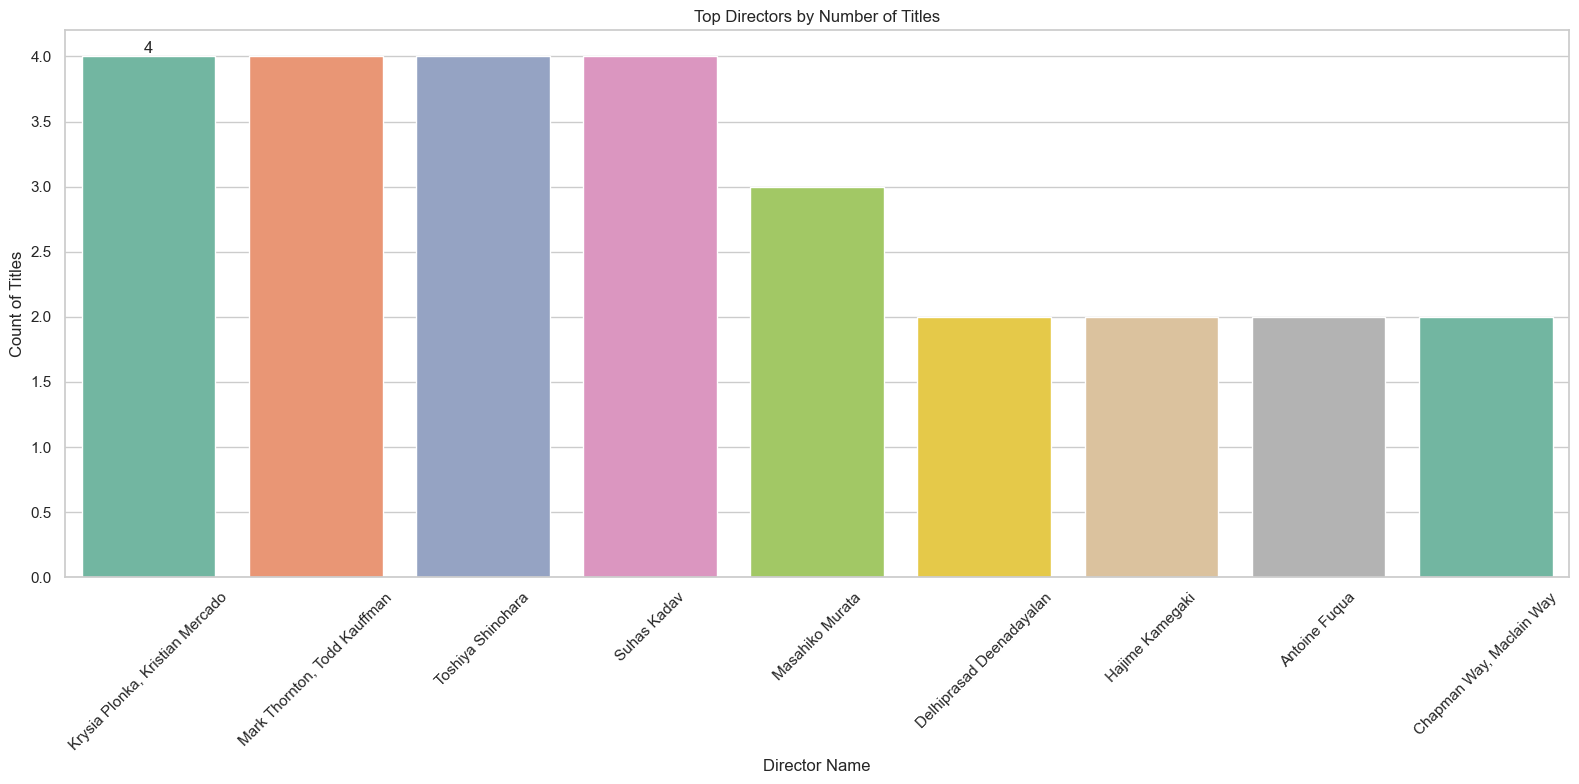

In [12]:
query = """SELECT director, COUNT(*) AS title_count
FROM netflix1
WHERE director IS NOT NULL
GROUP BY director
ORDER BY title_count DESC
LIMIT 9 OFFSET 1"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Director Name", "Count"])
df = df.sort_values(by="Count", ascending=False)
color_palette = sns.color_palette("Set2", len(df))
plt.figure(figsize=(16, 8))
ax = sns.barplot(x="Director Name", y="Count", data=df, palette=color_palette, hue="Director Name", dodge=False, legend=False)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title("Top Directors by Number of Titles")
plt.xlabel("Director Name")
plt.ylabel("Count of Titles")
plt.tight_layout()

plt.show()

# Geting the Longest Movies in Terms of Duration.

In [13]:
query = """SELECT show_title, duration
FROM netflix1
WHERE show_type = 'Movie'
ORDER BY CAST(SUBSTRING_INDEX(duration, ' ', 1) AS UNSIGNED) DESC
LIMIT 10"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Titles","Duration"])
df

,Titles,Duration
0,Headspace: Unwind Your Mind,273 min
1,Once Upon a Time in America,229 min
2,King of Boys,182 min
3,Jeans,166 min
4,Avvai Shanmughi,161 min
5,The Guns of Navarone,156 min
6,Cold Mountain,154 min
7,Minsara Kanavu,147 min
8,Omo Ghetto: the Saga,147 min
9,Tughlaq Durbar (Telugu),145 min


# Getting Yearly releases of Movies and TV Shows on Netflix.

In [14]:
query = """SELECT
  COUNT(CASE WHEN show_type = 'Movie' THEN 1 END) AS movie_count,
  COUNT(CASE WHEN show_type = 'TV Show' THEN 1 END) AS tv_show_count,
  release_year
FROM netflix.netflix1
GROUP BY release_year
ORDER BY release_year"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Movies","TV Shows","Release Year"])
df

,Movies,TV Shows,Release Year
0,1,0,1961
1,1,0,1975
2,1,0,1978
3,1,0,1980
4,1,0,1982
5,1,0,1983
6,1,0,1984
7,2,0,1986
8,1,0,1987
9,1,0,1989


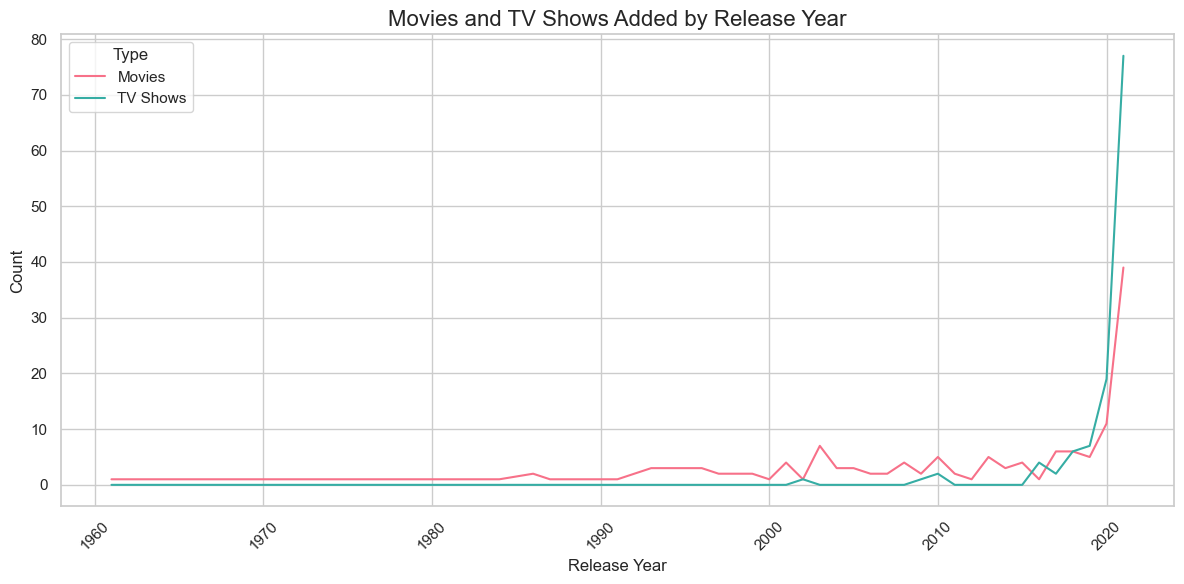

In [15]:
query = """SELECT
  COUNT(CASE WHEN show_type = 'Movie' THEN 1 END) AS movie_count,
  COUNT(CASE WHEN show_type = 'TV Show' THEN 1 END) AS tv_show_count,
  release_year
FROM netflix.netflix1
GROUP BY release_year
ORDER BY release_year"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Movies","TV Shows","Release Year"])
sns.set(style="whitegrid")
palette = sns.color_palette("husl", 2)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Release Year", y="Movies", label="Movies", color=palette[0])
sns.lineplot(data=df, x="Release Year", y="TV Shows", label="TV Shows", color=palette[1])
plt.title("Movies and TV Shows Added by Release Year", fontsize=16)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 countries with most content on Netflix.

In [16]:
query = """SELECT country, COUNT(*) AS count
FROM netflix1
WHERE country IS NOT NULL
GROUP BY country
ORDER BY count DESC
LIMIT 10"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Country","Count"])
df

,Country,Count
0,Pakistan,123
1,United States,68
2,Not Given,20
3,Japan,12
4,India,11
5,United Kingdom,7
6,France,4
7,Germany,4
8,South Africa,3
9,China,2


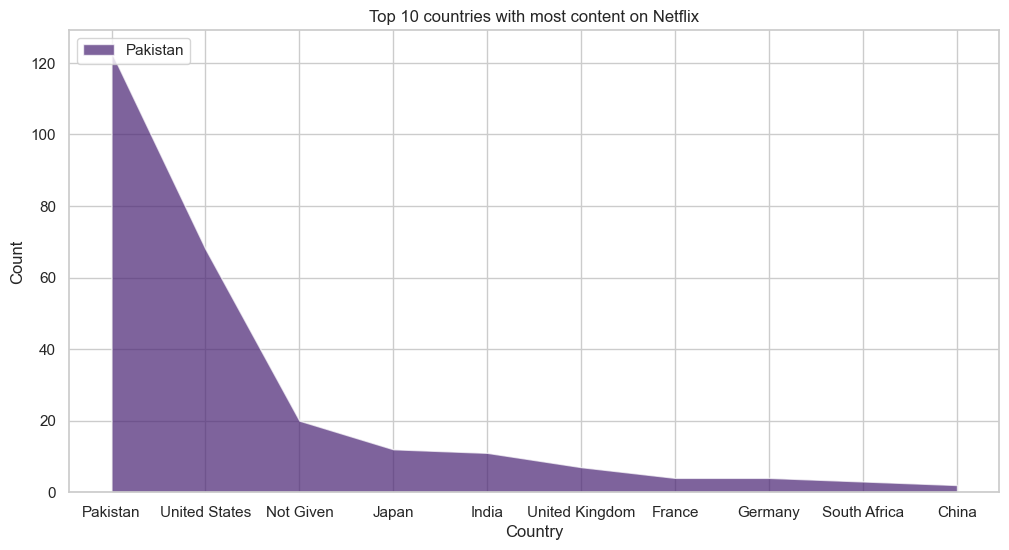

In [17]:
query = """SELECT country, COUNT(*) AS count
FROM netflix1
WHERE country IS NOT NULL
GROUP BY country
ORDER BY count DESC
LIMIT 10"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Country","Count"])
colors = sns.color_palette("viridis", len(df))  # Choose a color palette

# Create the area chart
plt.figure(figsize=(12, 6))
plt.stackplot(df['Country'], df['Count'], labels=df['Country'], colors=colors, alpha=0.7)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 countries with most content on Netflix')
plt.legend(loc='upper left')
plt.show()

# Calculating the Average Duration of Movies by Country.

In [18]:
query = """SELECT country, round(AVG(CAST(SUBSTRING_INDEX(duration, ' ', 1) AS UNSIGNED)),0) AS avg_duration
FROM netflix1
WHERE show_type = 'Movie' AND country IS NOT NULL
GROUP BY country
ORDER BY avg_duration DESC
LIMIT 10"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Country","Duration"])
df

,Country,Duration
0,Italy,229
1,Nigeria,165
2,South Africa,118
3,United Kingdom,113
4,India,112
5,Germany,112
6,China,103
7,Hong Kong,103
8,Canada,102
9,France,101


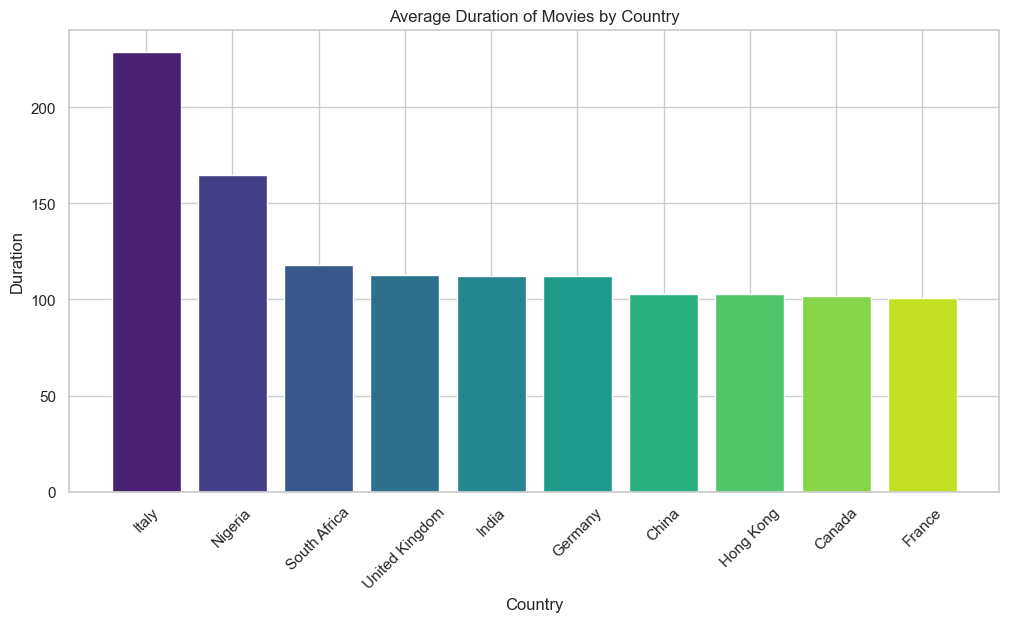

In [19]:
query = """SELECT country, round(AVG(CAST(SUBSTRING_INDEX(duration, ' ', 1) AS UNSIGNED)),0) AS avg_duration
FROM netflix1
WHERE show_type = 'Movie' AND country IS NOT NULL
GROUP BY country
ORDER BY avg_duration DESC
LIMIT 10"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Country","Duration"])
colors = sns.color_palette("viridis", len(df))
plt.figure(figsize=(12, 6))
plt.bar(df['Country'], df['Duration'], color=colors)
plt.xlabel('Country')
plt.ylabel('Duration')
plt.title('Average Duration of Movies by Country')
plt.xticks(rotation=45)
plt.show()

# Listing Titles Released Each Year with Their Count of Directors.

In [20]:
query = """SELECT release_year, COUNT(DISTINCT director) AS director_count, COUNT(*) AS title_count
FROM netflix1
WHERE director IS NOT NULL
GROUP BY release_year
ORDER BY release_year DESC"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Release Year","Director Count","Title Count"])
df

,Release Year,Director Count,Title Count
0,2021,34,116
1,2020,9,30
2,2019,4,12
3,2018,8,12
4,2017,7,8
5,2016,2,5
6,2015,4,4
7,2014,3,3
8,2013,4,5
9,2012,1,1


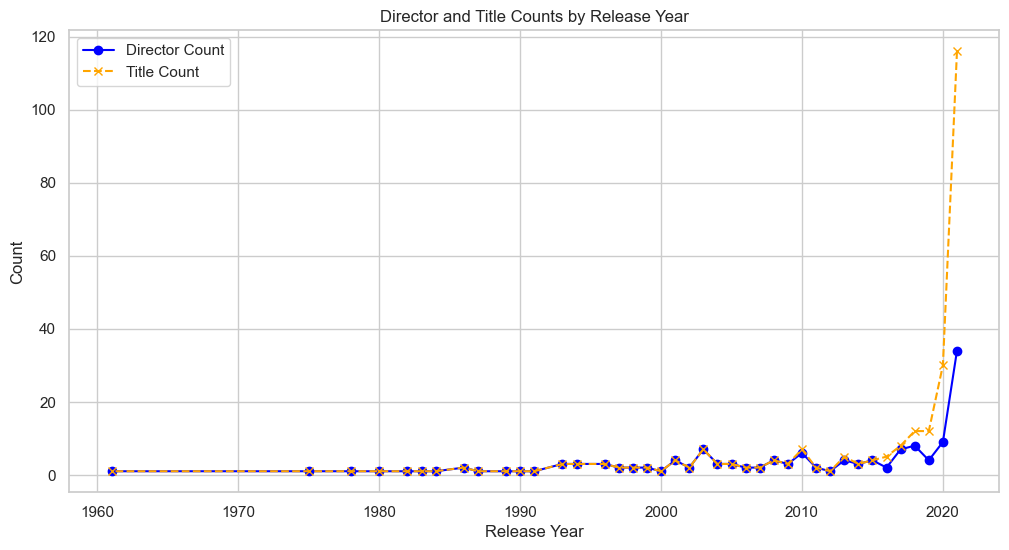

In [21]:
query = """SELECT release_year, COUNT(DISTINCT director) AS director_count, COUNT(*) AS title_count
FROM netflix1
WHERE director IS NOT NULL
GROUP BY release_year
ORDER BY release_year DESC"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Release Year","Director Count","Title Count"])
plt.figure(figsize=(12, 6))
plt.plot(df['Release Year'], df['Director Count'], label='Director Count', marker='o', linestyle='-', color='blue')
plt.plot(df['Release Year'], df['Title Count'], label='Title Count', marker='x', linestyle='--', color='orange')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Director and Title Counts by Release Year')
plt.legend()
plt.grid(True)
plt.show()

# Identifying the Rating Distribution Over Time.

In [22]:
query = """SELECT release_year, rating, COUNT(*) AS rating_count
FROM netflix1
WHERE rating IS NOT NULL
GROUP BY release_year, rating
ORDER BY release_year DESC, rating_count DESC
LIMIT 50"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Release Year","Rating","Rating Count"])
df

,Release Year,Rating,Rating Count
0,2021,TV-MA,53
1,2021,TV-14,23
2,2021,TV-PG,14
3,2021,TV-Y7,9
4,2021,TV-G,6
5,2021,PG-13,4
6,2021,PG,3
7,2021,TV-Y,3
8,2021,R,1
9,2020,TV-MA,9


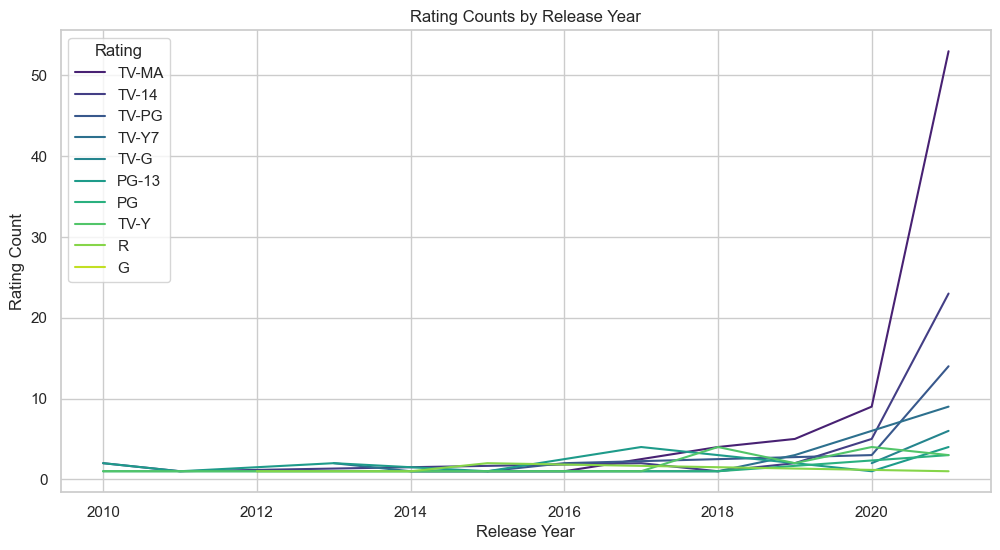

In [23]:
query = """SELECT release_year, rating, COUNT(*) AS rating_count
FROM netflix1
WHERE rating IS NOT NULL
GROUP BY release_year, rating
ORDER BY release_year DESC, rating_count DESC
LIMIT 50"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Release Year","Rating","Rating Count"])
color_palette = sns.color_palette("viridis", len(df['Rating'].unique()))
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release Year', y='Rating Count', hue='Rating', data=df, palette=color_palette)
plt.xlabel('Release Year')
plt.ylabel('Rating Count')
plt.title('Rating Counts by Release Year')
plt.legend(title='Rating')
plt.grid(True)
plt.show()

# Average Duration of Movies by Rating.

In [24]:
query = """SELECT rating, AVG(CAST(SUBSTRING_INDEX(duration, ' ', 1) AS UNSIGNED)) AS average_duration
FROM netflix1
WHERE show_type = 'Movie' AND duration IS NOT NULL
GROUP BY rating
ORDER BY average_duration DESC"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Rating","Avrage Duration"])
df

,Rating,Avrage Duration
0,TV-G,146.6667
1,R,114.5909
2,PG-13,106.2143
3,TV-14,103.4091
4,TV-PG,96.0000
5,PG,94.6429
6,TV-MA,90.1481
7,G,90.0000
8,TV-Y7,76.2500
9,TV-Y,62.2000


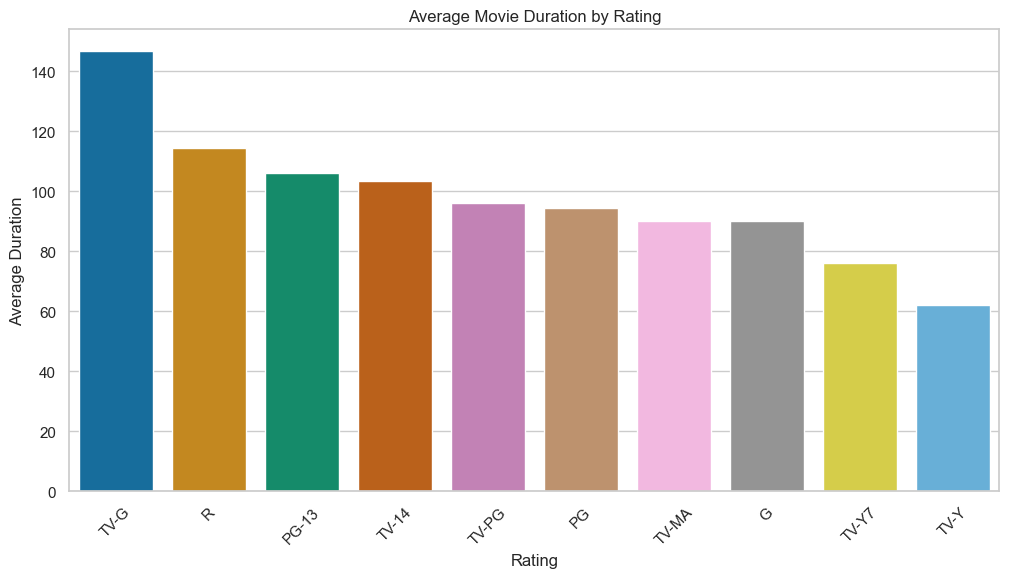

In [25]:
query = """SELECT rating, AVG(CAST(SUBSTRING_INDEX(duration, ' ', 1) AS UNSIGNED)) AS average_duration
FROM netflix1
WHERE show_type = 'Movie' AND duration IS NOT NULL
GROUP BY rating
ORDER BY average_duration DESC"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Rating","Avrage Duration"])
colors = sns.color_palette("colorblind", len(df))
plt.figure(figsize=(12, 6))
sns.barplot(x="Rating", y="Avrage Duration",  hue='Rating', data=df, palette=colors)
plt.xlabel("Rating")
plt.ylabel("Average Duration")
plt.title("Average Movie Duration by Rating")
plt.xticks(rotation=45)
plt.show()

# Analysis of Content Distribution by Country and Rating.

In [26]:
query = """SELECT 
    country,
    COUNT(*) AS total_titles,
    MAX(rating) AS most_common_rating,
    round(AVG(release_year),0) AS avg_release_year
FROM 
    netflix1
WHERE 
    country IS NOT NULL AND rating IS NOT NULL AND release_year IS NOT NULL
GROUP BY 
    country
ORDER BY 
    total_titles DESC"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Countries","Total Titles","Most Comman Rating","Average Release Year"])
df

,Countries,Total Titles,Most Comman Rating,Average Release Year
0,Pakistan,123,TV-Y7,2020
1,United States,68,TV-Y,2007
2,Not Given,20,TV-Y7,2019
3,Japan,12,TV-PG,2006
4,India,11,TV-Y7,2011
5,United Kingdom,7,TV-14,2003
6,France,4,TV-MA,2017
7,Germany,4,TV-MA,2014
8,South Africa,3,TV-MA,2016
9,China,2,TV-14,2011


#                                                                SUMMARY

In [27]:
query = """SELECT 
    show_type AS content_type,
    COUNT(*) AS total_titles,
    AVG(CASE WHEN show_type = 'Movie' AND duration IS NOT NULL THEN CAST(SUBSTRING_INDEX(duration, ' ', 1) AS UNSIGNED) ELSE NULL END) AS avg_duration,
    MIN(release_year) AS earliest_release_year,
    MAX(release_year) AS latest_release_year
FROM netflix1
WHERE show_type IS NOT NULL
GROUP BY show_type"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Content", "Total Titles", "Average Duration", "Earliest Year Release", "Latest Release Year"])
df

,Content,Total Titles,Average Duration,Earliest Year Release,Latest Release Year
0,Movie,145,99.4483,1961,2021
1,TV Show,119,None,2002,2021


# Conclusion

This project involved a structured approach to data cleaning, analysis, and visualization. Missing values were efficiently handled, and duplicates were removed to ensure accuracy. Key insights were extracted using SQL queries, summarizing patterns in content type, country, and release trends. With Python, libraries like pandas, matplotlib, and seaborn enabled comprehensive data exploration and visual representation. Analysis revealed popular genres, leading countries, and patterns in content distribution, while exploring viewer preferences uncovered relationships between release years and popularity. Engaging visuals, including charts, graphs, and heatmaps, effectively communicated these findings, delivering actionable insights to support strategic decision-making in content production. This workflow showcased proficiency in data cleaning, SQL querying, and Python visualization.

# Presented By Aditya Prakash.

# Thank You.